In [1]:
!pip install qsimcirq

In [2]:
import cirq
import qsimcirq as qsim

In [3]:
q0,q1 = cirq.LineQubit.range(2)
c = cirq.Circuit(cirq.H(q0),cirq.CX(q0,q1)) 
print('---Circuit---')
print(c)
print()

print('---Cirq result---')
cs=cirq.Simulator()
cr=cs.simulate(c)
print(cr)
print()

print('---Qsim Cirq result---')
qsims=qsim.QSimSimulator()
qsimr=qsims.simulate(c)
print(qsimr)

---Circuit---
0: ───H───@───
          │
1: ───────X───

---Cirq result---
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ + 0.707|11⟩

phase:
output vector: |⟩

---Qsim Cirq result---
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ + 0.707|11⟩


In [4]:
sample = cirq.sample_state_vector(qsimr.state_vector(),indices=[0,1],repetitions=10)
print(sample)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]]


In [5]:
q0,q1 = cirq.LineQubit.range(2)
c = cirq.Circuit(
    cirq.H(q0),cirq.X(q1),cirq.CX(q0,q1),
    cirq.measure(q0,key='qubit0'),
    cirq.measure(q1,key='qubit1'),
                ) 
print('---Circuit---')
print(c)
print()

print('---Cirq result---')
cs=cirq.Simulator()
cr=cs.run(c,repetitions=10)
print(cr)
print()

print('---Qsim Cirq result---')
qsims=qsim.QSimSimulator()
qsimr=qsims.run(c,repetitions=10)
print(qsimr)

---Circuit---
0: ───H───@───M('qubit0')───
          │
1: ───X───X───M('qubit1')───

---Cirq result---
qubit0=1110111011
qubit1=0001000100

---Qsim Cirq result---
qubit0=0000001111
qubit1=1111110000


In [6]:
q0 = cirq.LineQubit(0)
c = cirq.Circuit(
    cirq.X(q0)**0.5,cirq.measure(q0,key='m0'),
    cirq.X(q0)**0.5,cirq.measure(q0,key='m1'),
    cirq.X(q0)**0.5,cirq.measure(q0,key='m2')
                ) 
print('---Circuit---')
print(c)
print()

print('---Qsim Cirq result---')
qsims=qsim.QSimSimulator()
qsimr=qsims.run(c,repetitions=10)
print(qsimr)

---Circuit---
0: ───X^0.5───M('m0')───X^0.5───M('m1')───X^0.5───M('m2')───

---Qsim Cirq result---
m0=0011111100
m1=1011001100
m2=0100011011


In [7]:
# Using parameter sweeps
import sympy
q0 = cirq.GridQubit(1,1)
c = cirq.Circuit(cirq.X(q0)**sympy.Symbol('t'),cirq.measure(q0,key='pouriya'))

param_s = cirq.Linspace('t',start=0,stop=4,length=200)

rep = 10**3
s = cirq.Simulator()
trials = s.run_sweep(c,param_s,repetitions=rep)

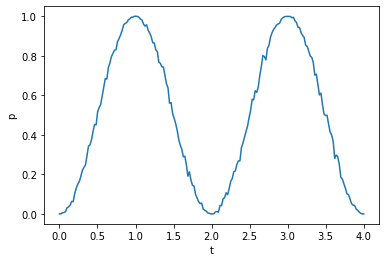

In [8]:
import matplotlib.pyplot as plt 

x=[]
for trial in trials:
    x.append(trial.params['t'])

y=[]
for trial in trials:
    y.append(trial.histogram(key='pouriya')[1] / rep)

plt.plot(x,y)
plt.xlabel('t')
plt.ylabel('p')
plt.show()

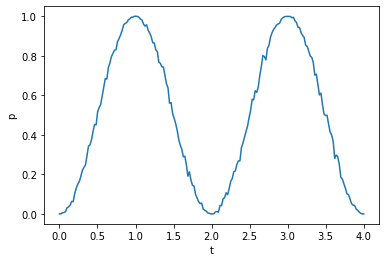

In [9]:
x1 = [trial.params['t'] for trial in trials]
y1 = [trial.histogram(key='pouriya')[1] / rep for trial in trials]
plt.plot(x1,y1)
plt.xlabel('t')
plt.ylabel('p')
plt.show()

In [10]:
# Unitary matrices and decompositions
print('----X gate----')
print(cirq.unitary(cirq.X))
print('----SWAP gate----')
print(cirq.unitary(cirq.SWAP))
print('----Circuit----')
q0,q1 = cirq.LineQubit.range(2)
print(cirq.unitary(cirq.Circuit( cirq.H(q0) ,cirq.SWAP(q0,q1) )))

----X gate----
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
----SWAP gate----
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
----Circuit----
[[ 0.70710678+0.j  0.        +0.j  0.70710678+0.j  0.        +0.j]
 [ 0.70710678+0.j -0.        +0.j -0.70710678+0.j -0.        +0.j]
 [ 0.        +0.j  0.70710678+0.j  0.        +0.j  0.70710678+0.j]
 [-0.        +0.j  0.70710678+0.j -0.        +0.j -0.70710678+0.j]]


In [11]:
q0 = cirq.LineQubit(0)
print(cirq.decompose(cirq.H(q0)))

[(cirq.Y**0.5).on(cirq.LineQubit(0)), cirq.XPowGate(global_shift=-0.25).on(cirq.LineQubit(0))]


In [12]:
q0,q1,q2 = cirq.LineQubit.range(3)
d_toffoli=cirq.decompose(cirq.TOFFOLI(q0,q1,q2))
print('Gates number :',len(d_toffoli))
print()
for i in d_toffoli:
    print(i)

Gates number : 35

Y**0.5(q(2))
XPowGate(exponent=1.0, global_shift=-0.25)(q(2))
T(q(0))
T(q(1))
T(q(2))
Y**-0.5(q(1))
CZ(q(0), q(1))
Y**0.5(q(1))
Y**-0.5(q(2))
CZ(q(1), q(2))
Y**0.5(q(2))
T**-1(q(1))
T(q(2))
Y**-0.5(q(1))
CZ(q(0), q(1))
Y**0.5(q(1))
Y**-0.5(q(2))
CZ(q(1), q(2))
Y**0.5(q(2))
T**-1(q(2))
Y**-0.5(q(1))
CZ(q(0), q(1))
Y**0.5(q(1))
Y**-0.5(q(2))
CZ(q(1), q(2))
Y**0.5(q(2))
T**-1(q(2))
Y**-0.5(q(1))
CZ(q(0), q(1))
Y**0.5(q(1))
Y**-0.5(q(2))
CZ(q(1), q(2))
Y**0.5(q(2))
Y**0.5(q(2))
XPowGate(exponent=1.0, global_shift=-0.25)(q(2))


In [13]:
# Optimizers

q0 = cirq.LineQubit(0)
c = cirq.Circuit()
c.append(cirq.Moment([]))
c.append(cirq.Moment([cirq.H(q0)]))
c.append(cirq.Moment([]))

print('Before optimization:', len(c))

# Use the drop_empty_moments function
c = cirq.drop_empty_moments(c)

print('After optimization:', len(c))

Before optimization: 3
After optimization: 1


In [25]:
#noise
bf = cirq.bit_flip(p=0.1)
print(bf)
nmuber_of_qubit = bf.num_qubits()
print(f"number of qubits : {nmuber_of_qubit}")
print()
for i,kraus in enumerate(cirq.kraus(bf)):
    print(f"Keras operator : {i}")
    print(f"Keras operator : {kraus}")

bit_flip(p=0.1)
number of qubits : 1

Keras operator : 0
Keras operator : [[0.9486833 0.       ]
 [0.        0.9486833]]
Keras operator : 1
Keras operator : [[0.        +0.j 0.31622777+0.j]
 [0.31622777+0.j 0.        +0.j]]


In [28]:
q = cirq.LineQubit(0)
c = cirq.Circuit(bf(q))
print('Circuit with bit flip gate : ',c)

Circuit with bit flip gate :  0: ───BF(0.1)───


In [32]:
c = cirq.Circuit(bf.on_each(cirq.LineQubit.range(3)))
print('Circuit with multi bit flip gate effect on qubits:\n\n ',c)

Circuit with multi bit flip gate effect on qubits:

  0: ───BF(0.1)───

1: ───BF(0.1)───

2: ───BF(0.1)───


In [37]:
cbf = bf.controlled(num_controls=1)
c = cirq.Circuit(cbf(*cirq.LineQubit.range(2)))
print(c)

0: ───@─────────
      │
1: ───BF(0.1)───


In [38]:
cbf = bf.controlled(num_controls=2)
c = cirq.Circuit(cbf(*cirq.LineQubit.range(3)))
print(c)

0: ───@─────────
      │
1: ───@─────────
      │
2: ───BF(0.1)───


In [46]:
#cirq.amplitude_damp? == help(cirq.amplitude_damp)

In [49]:
dp=cirq.asymmetric_depolarize(p_x=0.1,p_y=0.02,p_z=0.2)
c = cirq.Circuit( dp.on_each(cirq.LineQubit(0)) )
print(c)

0: ───A(0.1,0.02,0.2)───


In [50]:
# The channel and mixture protocols
bf = cirq.bit_flip(p=0.1)
print(bf)
print()
for prob,kraus in enumerate(cirq.mixture(bf)):
    print(f"probibility operator : {prob}")
    print(f"Keras operator : {kraus}")

bit_flip(p=0.1)

probibility operator : 0
Keras operator : (0.9, array([[1., 0.],
       [0., 1.]]))
probibility operator : 1
Keras operator : (0.1, array([[0.+0.j, 1.+0.j],
       [1.+0.j, 0.+0.j]]))


In [60]:
chn=cirq.amplitude_damp(0.1)
bf = cirq.bit_flip(p=0.1)
print('has mixture ?')
print('amplitude_damp : ',cirq.has_mixture(chn),'  |  bit_flip : ',cirq.has_mixture(bf))

has mixture ?
amplitude_damp :  False   |  bit_flip :  True


In [75]:
# Custom channels(bitflip noise with probibility 0.1)
import numpy as np
mix = [
    (0.9,np.array([[1,0],[0,1]] ,dtype=np.complex64)),
    (0.1,np.array([[0,1],[1,0]] ,dtype=np.complex64))
]

bf = cirq.MixedUnitaryChannel(mix)

# Custom channels(X-basis Measurement)
opr = [
    np.array([[1,0],[0,1]]) *0.5 ,
    np.array([[0,1],[1,0]]) *0.5 ,
]

x_measure = cirq.KrausChannel(opr,key='Xx')

In [79]:
q0 = cirq.LineQubit(0)
c = cirq.Circuit(bf.on(q0),cirq.H(q0),x_measure.on(q0))
c

MixedUnitaryChannel([(0.9, array([[1.+0.j, 0.+0.j],                               KrausChannel([array([[0.5, 0. ],
0: ───       [0.+0.j, 1.+0.j]], dtype=complex64)), (0.1, array([[0.+0.j, 1.+0.j],───H───       [0. , 0.5]]), array([[0. , 0.5],───
             [1.+0.j, 0.+0.j]], dtype=complex64))])                                            [0.5, 0. ]])], key=Xx)

In [81]:
c1= cirq.Circuit(
    cirq.bit_flip(0.1).on(q0),cirq.H(q0),cirq.H(q0),cirq.measure(q0,key='x'),cirq.H(q0)
)
c1

0: ───BF(0.1)───H───H───M('x')───H───

In [86]:
# The channel and mixture protocols

class qorpiBitFlip(cirq.Gate):
    def __init__(self,p:float) -> None :
        self._p = p
    
    def _num_qubits_(self):
        return 1
    
    def _mixture_(self):
        ps = [1 - self._p,self._p]
        opr = [cirq.unitary(cirq.I),cirq.unitary(cirq.Y)]
        return tuple(zip(ps,opr))
    
    def _has_mixture_(self) -> bool:
        return True
    
    def _circuit_diagram_info_(self,args) -> str:
        return f"qorpiBitFlip({self._p})"

In [101]:
qbp=qorpiBitFlip(p=0.1)

for prob,kraus in enumerate(cirq.mixture(qbp)):
    print(f"probibility operator : {prob}")
    print(f"Keras operator : {kraus}")

probibility operator : 0
Keras operator : (0.9, array([[1., 0.],
       [0., 1.]]))
probibility operator : 1
Keras operator : (0.1, array([[0.+0.j, 0.-1.j],
       [0.+1.j, 0.+0.j]]))


In [109]:
# simulatin noisy circuits
q = cirq.GridQubit(0,0)
c = cirq.Circuit(cirq.X(q),cirq.amplitude_damp(0.1)(q))
print('Circuit : ')
print(c)

dms = cirq.DensityMatrixSimulator()
rh = dms.simulate(c).final_density_matrix
print('final Density Matrix : ')
print(rh)

Circuit : 
(0, 0): ───X───AD(0.1)───
final Density Matrix : 
[[0.1       +0.j 0.        +0.j]
 [0.        +0.j 0.90000004+0.j]]


In [151]:
# monte carlo wave function simulator
q = cirq.GridQubit(0,0)
c = cirq.Circuit(cirq.bit_flip(0.5).on(q))
print('Circuit : ')
print(c)

s = cirq.Simulator()
psy = s.simulate(c).dirac_notation() 
print('final wave function : ')
print(psy)

Circuit : 
(0, 0): ───BF(0.5)───
final wave function : 
|0⟩


In [181]:
c = cirq.Circuit(cirq.bit_flip(0.5).on(q),cirq.measure(q))
print('Circuit : ')
print(c)
result = s.run(c,repetitions=10**2)
print(result.histogram(key=q))

Circuit : 
(0, 0): ───BF(0.5)───M───
Counter({1: 60, 0: 40})


In [196]:
# adding noise to Circuits
q0 = cirq.LineQubit(0)
q1 = cirq.LineQubit(1)

c = cirq.Circuit(cirq.H(q0),cirq.CNOT(q0,q1))
print('Circuit : ')
print(c)
print('--------------------------')

s = cirq.Simulator()
psy = s.simulate(c)
print(psy)
print('--------------------------')

noisy_circuit = c.with_noise(cirq.bit_flip(0.01))
print(noisy_circuit)
print('--------------------------')
noisy_psy = s.simulate(noisy_circuit)
print(noisy_psy)

Circuit : 
0: ───H───@───
          │
1: ───────X───
--------------------------
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ + 0.707|11⟩

phase:
output vector: |⟩
--------------------------
0: ───H───BF(0.01)[cirq.VirtualTag()]───@───BF(0.01)[cirq.VirtualTag()]───
                                        │
1: ───────BF(0.01)[cirq.VirtualTag()]───X───BF(0.01)[cirq.VirtualTag()]───
--------------------------
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ + 0.707|11⟩

phase:
output vector: |⟩
